In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Reg no: 24MAI0104

In [2]:
#load the datset
data=pd.read_csv(r"C:\Users\gowth\Downloads\AmesHousing.csv")
#Reg no: 24MAI0104

In [3]:
print(data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [4]:
print(data.columns)#Reg no: 24MAI0104

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:


# Assuming 'features' and 'target' are defined correctly
features = ['Gr Liv Area', 'Year Built']
target = 'SalePrice'  # Example of target variable

# Assuming 'data' is your DataFrame
x = data[features]
y = data[target]#Reg no: 24MAI0104


In [6]:
#fill missing values with mean
x=x.fillna(x.mean())
y=y.fillna(y.mean())#24MAI0104 (GOWTHAM.J)

In [7]:
#split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#24MAI0104 (GOWTHAM.J)

In [8]:
#Transform the features to polynomial features
poly_features=PolynomialFeatures(degree=2)
x_poly_train=poly_features.fit_transform(x_train)#24MAI0104 (GOWTHAM.J)
x_poly_test=poly_features.transform(x_test)

In [9]:
#create and train the model
model=LinearRegression()
model.fit(x_poly_train,y_train)#24MAI0104 (GOWTHAM.J)

LinearRegression()

In [10]:
#make predictions
y_train_pred=model.predict(x_poly_train)#24MAI0104 (GOWTHAM.J)
y_test_pred=model.predict(x_poly_test)
#Reg no: 24MAI0104

In [11]:
#caluculate performance metrics

train_mse=mean_squared_error(y_train,y_train_pred)#24MAI0104 (GOWTHAM.J)
test_mse=mean_squared_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)
#"Reg no:24MAI0104"

In [12]:
print("Reg no:24MAI0104")
print("Training Mean Squared Error(MSE):",train_mse)
print("Training Mean Squared Error(MSE):",test_mse)#24MAI0104 (GOWTHAM.J)
print("Training R^2 Score :",train_r2)
print("Testing R^2 Score:",test_r2)

Reg no:24MAI0104
Training Mean Squared Error(MSE): 1889928769.0922892
Training Mean Squared Error(MSE): 2407047040.306275
Training R^2 Score : 0.6821372899447561
Testing R^2 Score: 0.6997776550824131


<function matplotlib.pyplot.show(close=None, block=None)>

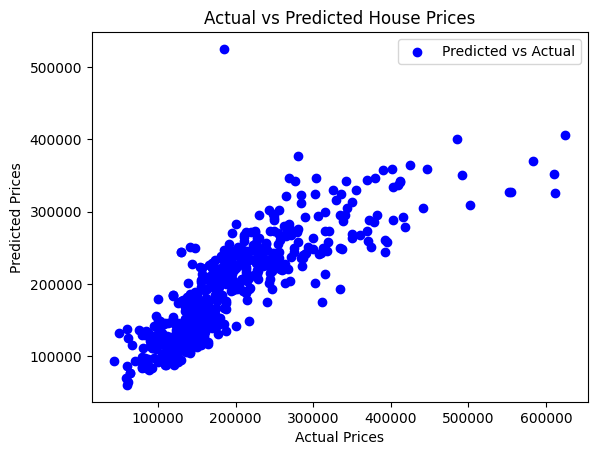

In [13]:
#"Reg no:24MAI0104"
#visualize the actual vs predicted prices
plt.scatter(y_test,y_test_pred,color='blue',label='Predicted vs Actual')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show